# DeepWalk实战-维基百科词条图嵌入可视化

## 安装工具包

In [1]:
# !pip install networkx gensim pandas numpy tqdm scikit-learn matplotlib

## 导入工具包

In [2]:
import networkx as nx # 图数据挖掘

# 数据分析
import pandas as pd
import numpy as np

import random # 随机数
from tqdm import tqdm # 进度条

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
df = pd.read_csv("./data/bilibili_tag.csv", sep = "\t")

In [4]:
df.head()

,A,B
0,嘻哈,音乐分享官
1,嘻哈,GAI
2,嘻哈,音乐
3,嘻哈,音乐综合
4,嘻哈,经典现场


In [5]:
df.shape

(2021, 2)

## 构建无向图

In [6]:
G = nx.from_pandas_edgelist(df, df.columns[0], df.columns[1], create_using=nx.Graph())

In [7]:
# 节点个数
len(G)

559

## 可视化

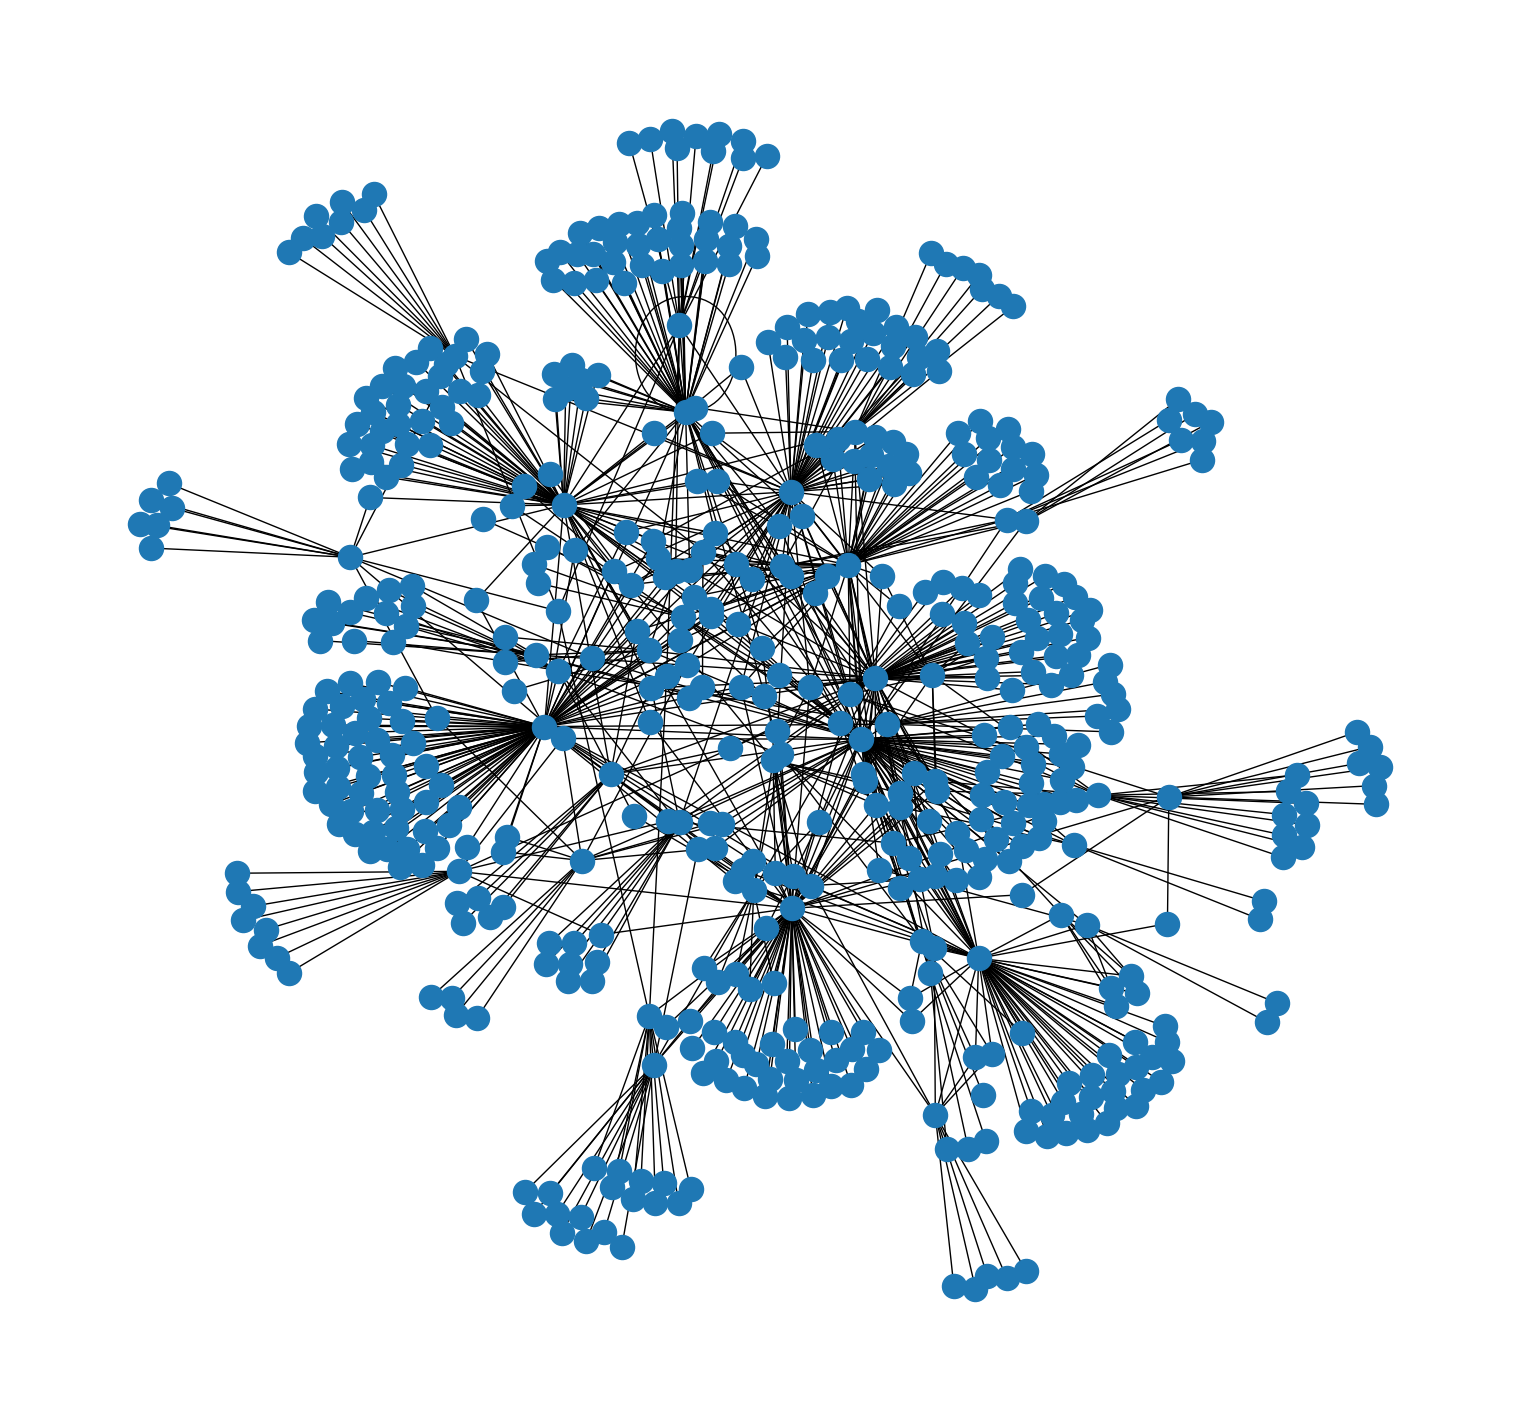

In [8]:
# 可视化
plt.figure(figsize=(15,14))
nx.draw(G)
plt.show()

## 生成随机游走节点序列的函数

In [9]:
def get_randomwalk(node, path_length):
    '''
    输入起始节点和路径长度，生成随机游走节点序列
    '''
    
    random_walk = [node]
    
    for i in range(path_length-1):
        # 汇总邻接节点
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break
        # 从邻接节点中随机选择下一个节点
        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [10]:
all_nodes = list(G.nodes())

In [11]:
all_nodes

['嘻哈',
 '音乐分享官',
 'GAI',
 '音乐',
 '音乐综合',
 '经典现场',
 'VAVA',
 '中文说唱',
 '小青龙',
 '艾福杰尼',
 '黄旭',
 'Jony J',
 '中国有嘻哈',
 '音乐分享官5.0',
 '极乐净土',
 '乐评盘点',
 '二次元',
 '动漫音乐',
 'ACG音乐',
 'One last kiss',
 '音乐分享官7.0',
 '美依礼芽',
 '群青',
 'B站神曲',
 '萌娃',
 '运动',
 '音乐推荐',
 '歌曲',
 '动物',
 '听歌',
 '拍摄',
 '高能娱评官',
 '必剪创作',
 '娱乐',
 '娱乐杂谈',
 '生活',
 '萌',
 '可爱',
 '治愈系',
 '网红',
 '瑶一瑶',
 '热播综艺',
 '星动安利大作战·春日篇',
 '经典',
 '穿越时空的思念',
 '音乐分享官4.0',
 '幻昼',
 '伤感纯音乐',
 '告白之夜',
 '纯音乐',
 '轻音乐',
 '高音质',
 'BGM',
 '雨的印记',
 '我的世界',
 '音游',
 '演奏',
 '单机游戏',
 '音乐游戏',
 'MC',
 '别人的世界',
 '红石音乐',
 '耍把戏',
 '音乐教学',
 '视频',
 '视唱练耳',
 '听音',
 '艺考',
 '课堂',
 '系列',
 '钢琴',
 '流行音乐',
 '自学教程',
 '电钢琴入门',
 '音乐制作',
 '伴奏',
 '即兴伴奏',
 '学习资料',
 '钢琴教学',
 '学音乐',
 '钢琴曲',
 '暑期爆肝挑战',
 '钢琴演奏',
 'Bi.Bi',
 '独奏',
 '夏日音乐祭',
 '音乐安利大赏',
 '翻唱',
 'KPOP人集合企划',
 '欧美音乐',
 '英文歌曲',
 '英文',
 '洗脑',
 '音乐安利大赏2.0',
 'The Backrooms',
 'backrooms',
 '后室',
 'Level!',
 'Level ！',
 '音乐分享官6.0',
 '校园',
 '太好听了',
 '学生',
 '宅舞',
 '舞蹈',
 'GARNiDELiA',
 'Miume・MARiA・217',
 '217',
 'MARiA',
 'miume'

In [12]:
get_randomwalk('嘻哈', 5)

['嘻哈', '动画', '二次元', '动画短片群星计划', '原创动画']

## 生成随机游走序列

In [13]:
gamma = 10 # 每个节点作为起始点生成随机游走序列个数
walk_length = 5 # 随机游走序列最大长度

In [14]:
random_walks = []

for n in tqdm(all_nodes): # 遍历每个节点
    for i in range(gamma): # 每个节点作为起始点生成gamma个随机游走序列
        random_walks.append(get_randomwalk(n, walk_length))

100%|██████████████████████████████████████████████████████████████████████████████| 559/559 [00:00<00:00, 1576.41it/s]


In [15]:
# 生成随机游走序列个数
len(random_walks)

5590

In [16]:
random_walks[1]

['嘻哈', '欧美音乐', 'One last kiss', '明日香', '新世纪福音战士']

## 训练Word2Vec模型

In [17]:
from gensim.models import Word2Vec # 自然语言处理

In [18]:
model = Word2Vec(vector_size=32, # Embedding维数
                 window=1, # 窗口宽度
                 sg=1, # Skip-Gram
                 hs=0, # 不加分层softmax
                 negative=10, # 负采样
                 alpha=0.03,  # 初始学习率
                 min_alpha=0.0007, # 最小学习率
                 seed=14 # 随机数种子
                )

In [19]:
# 用随机游走序列构建词汇表
model.build_vocab(random_walks, progress_per=2)

In [20]:
# 训练（耗时1分钟左右）
model.train(random_walks, total_examples=model.corpus_count, epochs=50, report_delay=1)

(797661, 1121100)

## 分析Word2Vec结果

In [21]:
# 查看某个节点的Embedding
model.wv.get_vector('音乐').shape

(32,)

In [22]:
model.wv.get_vector('音乐')

array([-0.32079512, -0.49982166, -0.6144473 ,  0.70382184,  1.044903  ,
        0.92270553,  0.91152775,  0.35614643,  0.961142  ,  0.17281023,
       -0.58900315,  1.178276  , -0.22300176, -0.85660344, -0.61247474,
       -0.43036667, -0.17294152, -0.03599273,  0.370551  , -0.39824393,
       -0.44497257, -0.408238  , -0.83117944, -0.0224992 , -0.05329335,
       -1.1366148 , -0.07938185, -0.24884638,  1.0035608 , -0.474718  ,
       -0.21033126,  0.1087698 ], dtype=float32)

In [23]:
# 找相似词语
model.wv.similar_by_word('音乐')

[('经典老歌', 0.7277297377586365),
 ('音乐合集', 0.7110761404037476),
 ('欧美流行', 0.7076173424720764),
 ('经典英文歌', 0.705081045627594),
 ('音乐素人投稿季', 0.7013139724731445),
 ('汪峰', 0.6970634460449219),
 ('##全能音乐挑战赛##', 0.693393886089325),
 ('小精灵', 0.6853241920471191),
 ('官方MV', 0.6837971210479736),
 ('银行卡', 0.6738358736038208)]

## PCA降维可视化

### 可视化全部词条的二维Embedding

In [24]:
X = model.wv.vectors

In [25]:
# 将Embedding用PCA降维到2维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embed_2d = pca.fit_transform(X)

In [26]:
embed_2d.shape

(559, 2)

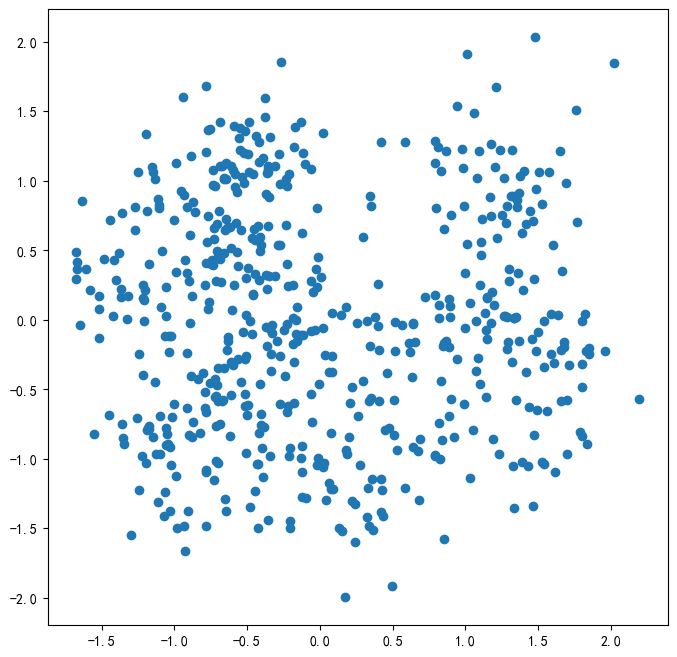

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

### 可视化某个词条的二维Embedding

In [28]:
term = '嘻哈'

In [29]:
term_256d = model.wv[term].reshape(1,-1)

In [30]:
term_256d.shape

(1, 32)

In [31]:
term_2d = pca.transform(term_256d)

In [32]:
term_2d

array([[-0.48898998,  1.4236188 ]], dtype=float32)

In [33]:
# 查找 嘻哈 节点的相似节点
model.wv.most_similar('嘻哈')
# 也可以用下面函数
# model.wv.similar_by_word('嘻哈')

[('真人秀', 0.8187468647956848),
 ('中国有嘻哈', 0.8170186281204224),
 ('Jony J', 0.8145753741264343),
 ('HIPHOP', 0.8089882731437683),
 ('华语MV', 0.8049973845481873),
 ('黄旭', 0.8049343228340149),
 ('NF', 0.8038427233695984),
 ('DISS', 0.8022597432136536),
 ('FREESTYLE', 0.7967588305473328),
 ('动感视频', 0.7949792146682739)]

In [34]:
# 查看任意两个节点的相似度
model.wv.similarity('嘻哈', '说唱')

0.5563612

In [35]:
# 查看任意两个节点的相似度
model.wv.similarity('嘻哈', '日语')

0.29083815

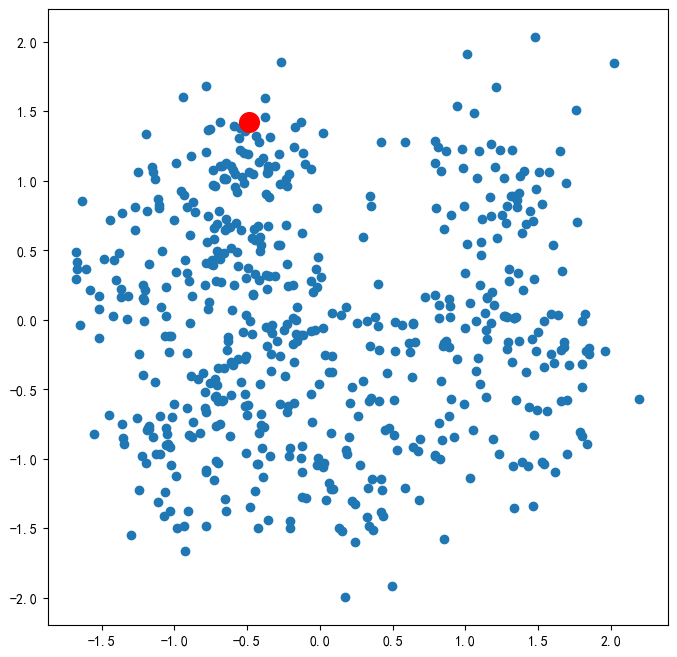

In [36]:
plt.figure(figsize=(8,8))
plt.scatter(embed_2d[:,0], embed_2d[:,1])
plt.scatter(term_2d[:,0],term_2d[:,1],c='r',s=200)
plt.show()

### 可视化某些词条的二维Embedding

In [37]:
# 计算PageRank重要度
pagerank = nx.pagerank(G)
# 从高到低排序
node_importance = sorted(pagerank.items(), key=lambda x:x[1], reverse=True)

In [38]:
# 取最高的前n个节点
n = 50
terms_chosen = []
for each in node_importance[:n]:
    terms_chosen.append(each[0])

In [39]:
# 手动补充新节点
# terms_chosen.extend(['computer vision','deep learning','convolutional neural network','convolution','natural-language processing','attention (machine learning)','support-vector machine','decision tree','random forest','computational imaging','machine vision','cognitive science','neuroscience','psychophysics','brain','visual cortex','visual neuroscience','cognitive model','finite difference','finite difference time domain','finite difference coefficients','finite difference methods for option pricing','iso 128','iso 10303'])


In [40]:
terms_chosen

['音乐分享官',
 '音乐',
 '二次元',
 '乐评盘点',
 '动漫音乐',
 '嘻哈',
 'One last kiss',
 '极乐净土',
 'ACG音乐',
 '音乐研究所',
 '动画',
 '配音',
 'AMV',
 '日本',
 '动画短片群星计划',
 '2023新年音乐大作战',
 '知识分享官',
 '萌娃',
 '日语',
 '演奏挑战赛',
 '必剪创作',
 '政在联动中',
 '钢琴',
 '翻唱挑战赛',
 '动画加工厂',
 '浪姐教你跳极乐净土',
 '新世纪福音战士',
 '音乐综合',
 '翻唱',
 'BML',
 '看一遍就爱上的日语现场',
 '二次元中二小剧场',
 '音乐安利大赏',
 '你的名字',
 '新世代音乐人计划女生季',
 '一起看姐姐72面',
 '音乐现场',
 '中岛美嘉',
 'LIVE',
 '再跳一遍《极乐净土》回忆杀',
 '水树奈奈',
 '干杯音乐节',
 '美依礼芽',
 '张国荣逝世20周年纪念',
 '极乐净土三人组金曲心动挑战',
 '娱乐',
 '生活',
 '流行音乐',
 '演奏',
 '音乐分享官5.0']

In [41]:
# 输入词条，输出词典中的索引号
term2index = model.wv.key_to_index

In [42]:
# index2term = model.wv.index_to_key
# term_index = np.array(term2index.values())

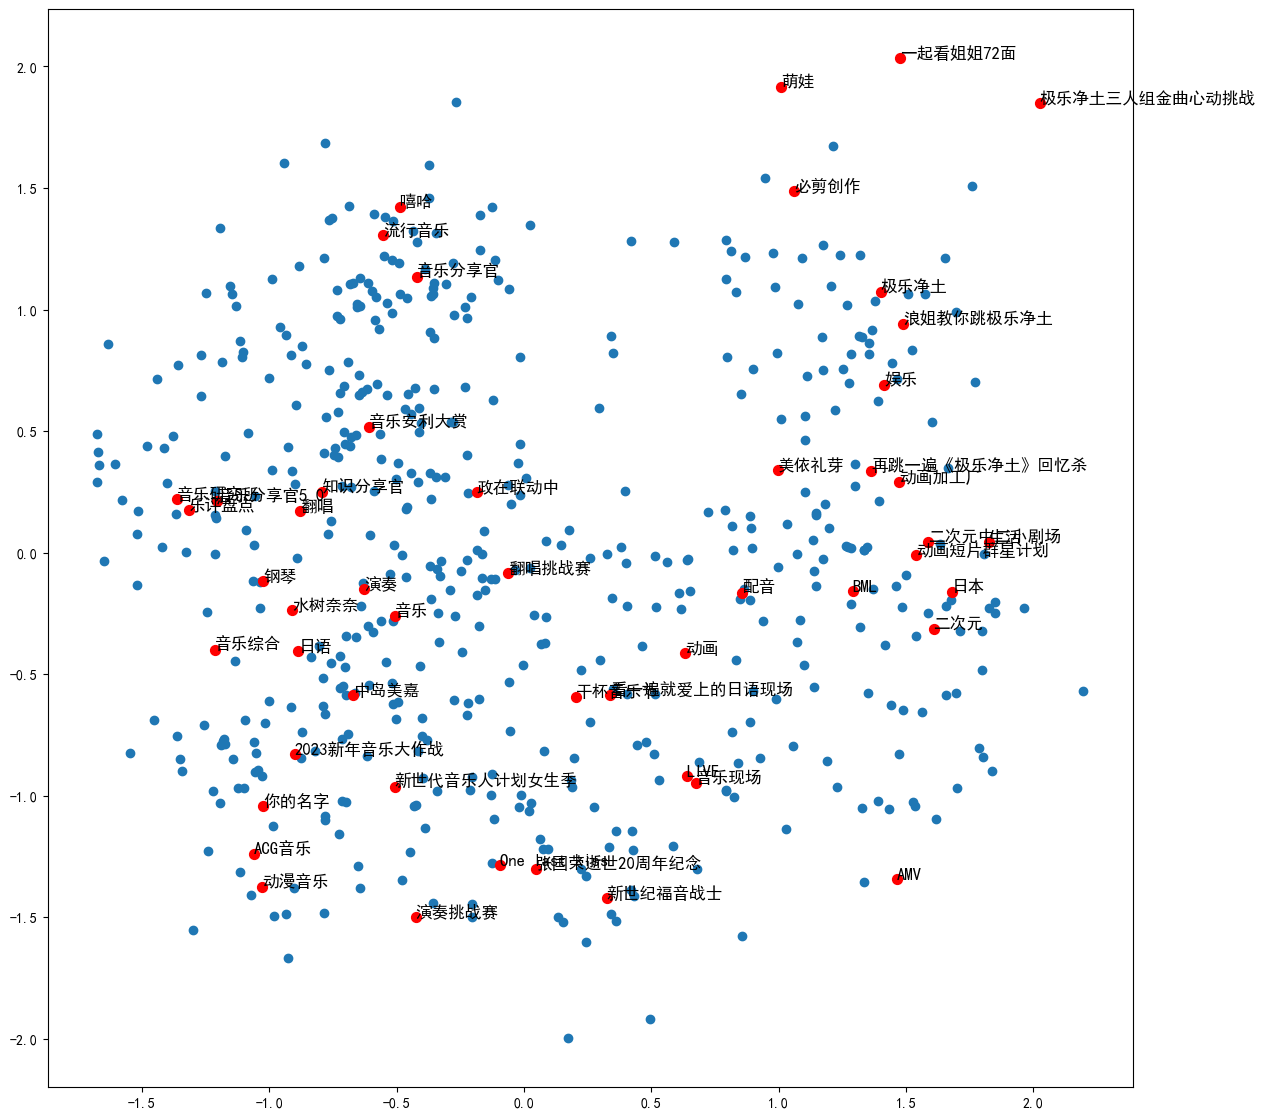

In [43]:
# 可视化全部词条和关键词条的二维Embedding
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1])

for item in terms_chosen:
    idx = term2index[item]
    plt.scatter(embed_2d[idx,0], embed_2d[idx,1],c='r',s=50)
    plt.annotate(item, xy=(embed_2d[idx,0], embed_2d[idx,1]),c='k',fontsize=12)
plt.show()

## TSNE降维可视化

### 可视化全部词条的二维Embedding¶

In [44]:
# 将Embedding用TSNE降维到2维
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=1000)
embed_2d = tsne.fit_transform(X)

D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


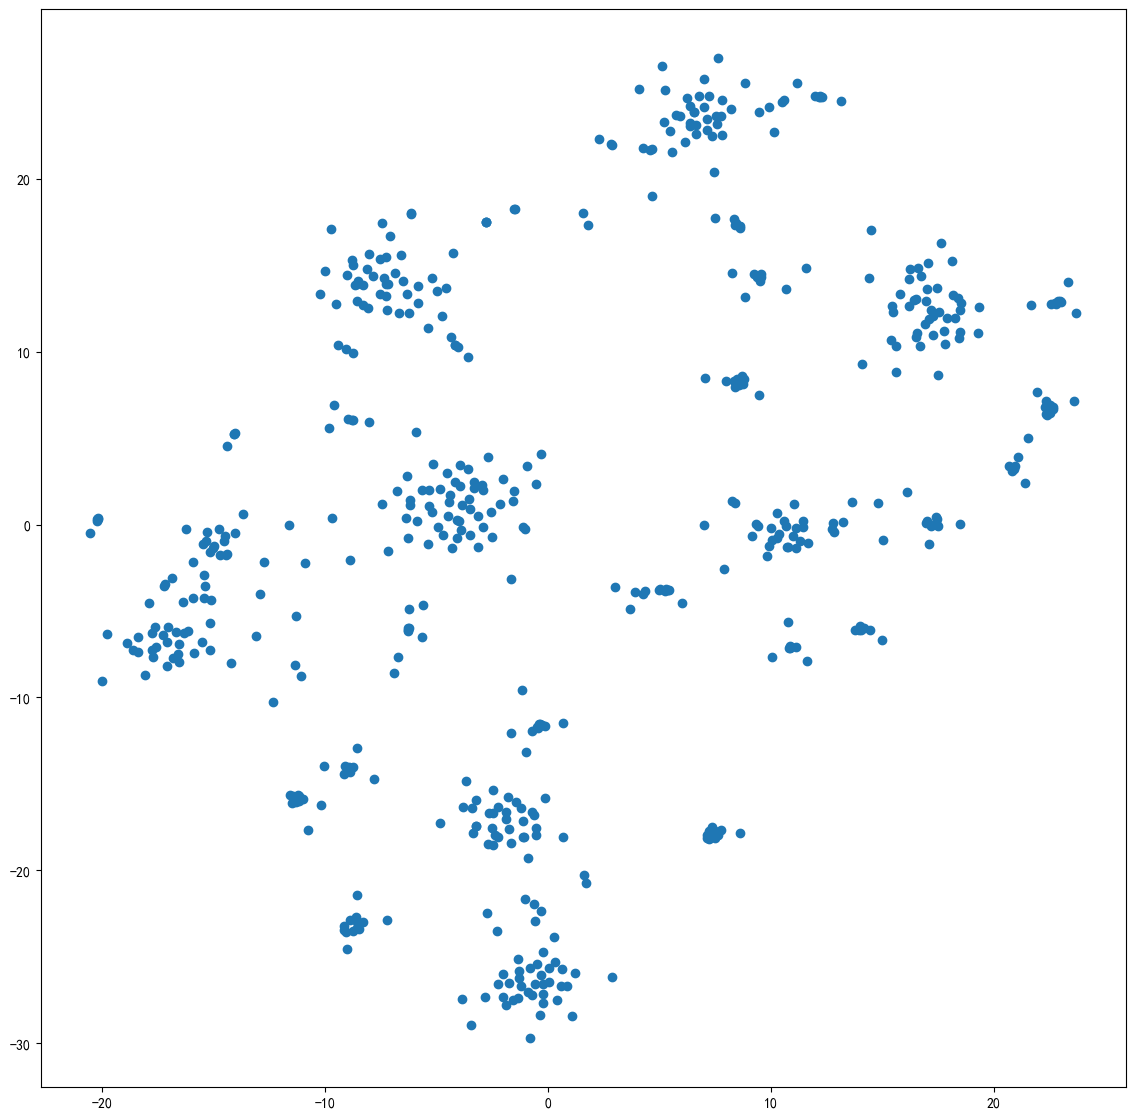

In [45]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

### 可视化全部词条和关键词条的二维Embedding

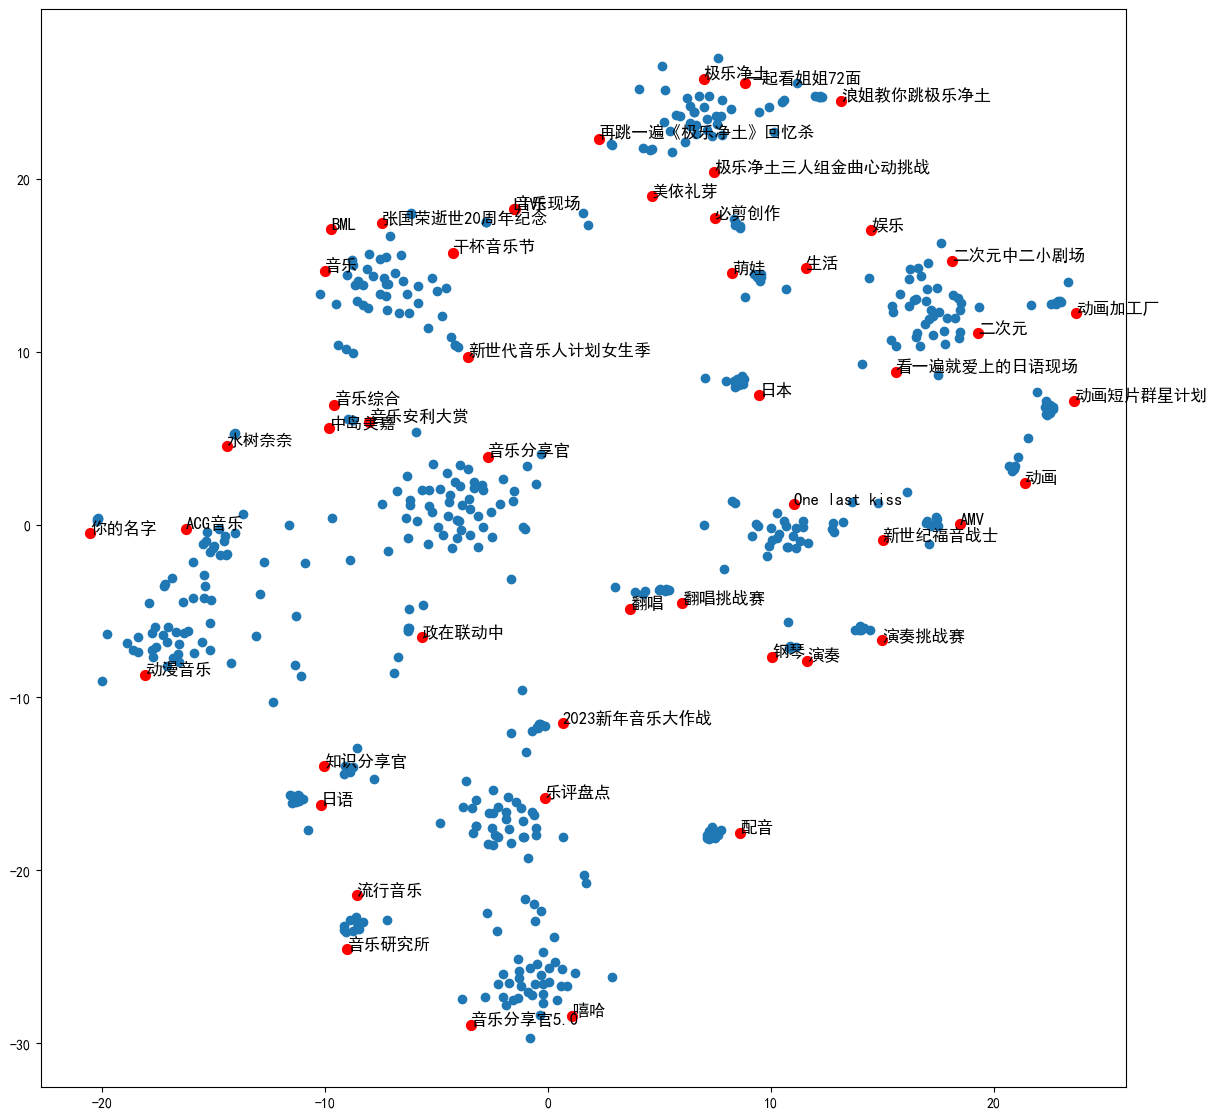

In [46]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1])

for item in terms_chosen:
    idx = term2index[item]
    plt.scatter(embed_2d[idx,0], embed_2d[idx,1],c='r',s=50)
    plt.annotate(item, xy=(embed_2d[idx,0], embed_2d[idx,1]),c='k',fontsize=12)
plt.show()

In [47]:
embed_2d.shape

(559, 2)

### 导出TSNE降维到二维之后的Embedding

In [48]:
terms_chosen_mask = np.zeros(X.shape[0])
for item in terms_chosen:
    idx = term2index[item]
    terms_chosen_mask[idx] = 1

In [49]:
df = pd.DataFrame()
df['X'] = embed_2d[:,0]
df['Y'] = embed_2d[:,1]
df['item'] = model.wv.index_to_key
df['pagerank'] = pagerank.values()
df['chosen'] = terms_chosen_mask

In [50]:
df

,X,Y,item,pagerank,chosen
0,-2.704201,3.926083,音乐分享官,0.032587,1.0
1,-10.010531,14.656315,音乐,0.048502,1.0
2,19.298059,11.056866,二次元,0.000755,1.0
3,-0.135963,-15.790061,乐评盘点,0.041230,1.0
4,-18.053310,-8.707891,动漫音乐,0.005284,1.0
...,...,...,...,...,...
554,-2.484180,-18.543203,抄袭,0.000755,0.0
555,9.570195,14.479486,娱乐杂谈,0.000755,0.0
556,11.665844,-1.056185,日本明星,0.000755,0.0
557,-6.498269,14.097830,华晨宇,0.000755,0.0


In [51]:
df.to_csv('./res/tsne_vis_2d.csv',index=False)